---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2025-2026</div>
---

---
# <center> TME programmation d'automates finis </center>

L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes

Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est 
`Projet_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).

---

### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

> [6. Application](#sec6)

In [6]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase
import itertools

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [5]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [8]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [11]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [12]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [13]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [14]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [15]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [18]:
# t : Transition
t = Transition(s, "a", s)

In [ ]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [20]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [22]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [23]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [26]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [28]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [30]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [32]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [34]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [ ]:
# automate : Automate
automate = Automate.creationAutomate("exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [0(init)-a->1]
  [3(fin)-a->3(fin)]
  [0(init)-b->0(init)]
  [3(fin)-b->3(fin)]
  [0(init)-a->0(init)]
  [1-a->2]
  [2-a->3(fin)]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

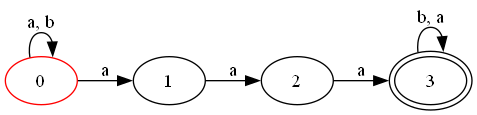

In [55]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [57]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [59]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [1-b->2(fin)]



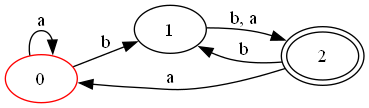

In [61]:
# A faire par l'étudiant
# Creation d'etat s0, s1, s2
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)

#Creation des transitions
t1 = Transition(s0, "a", s0)
t2 = Transition(s0, "b", s1)
t3 = Transition(s1, "a", s2)
t4 = Transition(s1, "b", s2)
t5 = Transition(s2, "a", s0)
t6 = Transition(s2, "b", s1)

#Creation automate
auto = Automate({t1, t2, t3, t4, t5, t6})

print(auto)
auto.show(1.2)

2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [1-b->2(fin)]



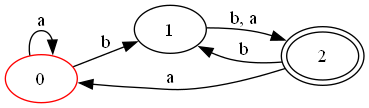

In [63]:
# A faire par l'étudiant
auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})
print(auto1)
auto1.show(1.2)

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-b->1]
  [0(init)-a->0(init)]
  [1-b->2(fin)]



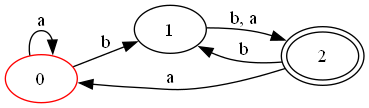

In [ ]:
# A faire par l'étudiant
auto2 = Automate.creationAutomate("auto2.txt")
print(auto2)
auto2.show(1.2)

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [1-b->2(fin)]



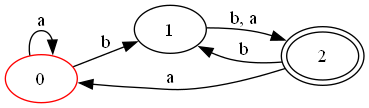

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]
  [2(fin)-a->0(init)]
  [1-b->2(fin)]



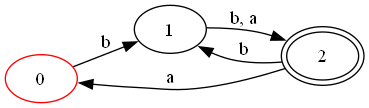

In [70]:
# A faire par l'étudiant
t = Transition(s0, "a", s1)
auto.removeTransition(t)
print(auto)
auto.show(1.2)
auto.removeTransition(t1)
print(auto)
auto.show(1.2)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [1-b->2(fin)]



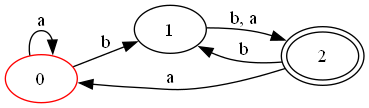

In [72]:
# A faire par l'étudiant
auto.addTransition(t1)
print(auto)
auto.show(1.2)

2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

Etats :
  0(init)
  2(fin)
Transitions :
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



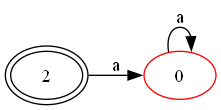

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



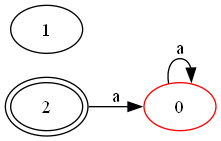

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



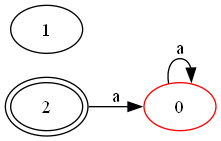

In [78]:
# A faire par l'étudiant
auto.removeState(s1)
print(auto)
auto.show(1.2)
auto.addState(s1)
print(auto)
auto.show(1.2)
s0bis = State(0, True, False)
auto.addState(s0bis)
print(auto)
auto.show(1.2)

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [81]:
# A faire par l'étudiant
print(auto1.getSetTransitionsFrom(s1))

{[1-b->2(fin)], [1-a->2(fin)]}


### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \text{il existe } s \in L \text{ tel que } s \xrightarrow{a} s'\}.$$

In [85]:
# A faire par l'étudiant

def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    result = set()
    for s in setStates:
        result = result.union(self.succElem(s, lettre))
    return result

Automate.succ = succ

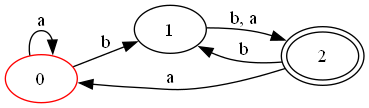

---


In [87]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}

In [89]:
# Fournir un autre jeu de tests
assert auto1.succ({s1, s2}, 'b') == {s1, s2}
assert auto1.succ({s2}, 'a') == {s0}
assert auto1.succ({s0, s1, s2}, 'a') == {s0, s2}
assert auto1.succ({s0, s1}, 'b') == {s1, s2}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [92]:
# A faire par l'étudiant

def accepte(self, mot) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    # Ensemble courant d'états initiaux
    etats_courants = self.getSetInitialStates()
    for lettre in mot:
         # Calcul des successeurs
        etats_courants = self.succ(etats_courants, lettre)
        # Si aucun état n'est accessible, le mot est rejeté
        if not etats_courants:
            return False
            
     # Vérifie si l'un des états courants est final
    for s in etats_courants:
        if s.fin:
            return True
            
    return False

Automate.accepte = accepte

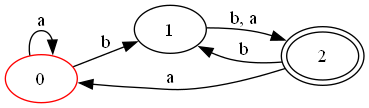

---


In [94]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True


In [96]:
# Fournir un autre jeu de tests
assert auto1.accepte('') == False
assert auto1.accepte('aab') == False
assert auto1.accepte('bb') == True
assert auto1.accepte('baa') == False
assert auto1.accepte('ababa') == True
assert auto1.accepte('abab') == False

3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles.

In [98]:
# A faire par l'étudiant

### On ne prend pas en compte les états non accessibles


def estComplet(self, Alphabet) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
     # Ensemble des états accessibles
    etats_accessibles = set(self.getSetInitialStates())
    a_traiter = list(self.getSetInitialStates())

    # Parcours en largeur pour récupérer tous les états accessibles
    while a_traiter:
        s = a_traiter.pop()
        for lettre in Alphabet:
            successeurs = self.succElem(s, lettre)
            for successeur in successeurs:
                if successeur not in etats_accessibles:
                    etats_accessibles.add(successeur)
                    a_traiter.append(successeur)

    # Vérifier si chaque état accessible a une transition pour chaque lettre
    for s in etats_accessibles:
        for lettre in Alphabet:
            if not self.succElem(s, lettre):
                return False
                
    return True

Automate.estComplet = estComplet

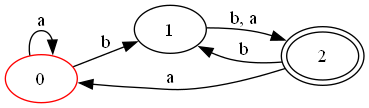

---


In [100]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

In [102]:
# Fournir un autre jeu de tests
assert auto1.estComplet({'a'}) == True
assert auto1.estComplet({'b'}) == True
assert auto1.estComplet({'a', 'b', 'd'}) == False
assert auto1.estComplet(set()) == True

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [153]:
# A faire par l'étudiant

def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    # Vérifie qu'il n'y a qu'un seul état initial
    if len(self.getSetInitialStates()) != 1:
        return False

    # Vérifie qu'il n'y a pas de transitions multiples pour la même lettre depuis un état
    for s in self.allStates:
        lettres_vues = set()
        for t in self.getSetTransitionsFrom(s):
            if t.etiquette in lettres_vues:
                return False
            lettres_vues.add(t.etiquette)
            
    return True
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

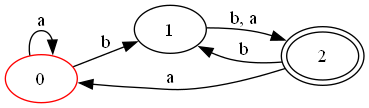

---


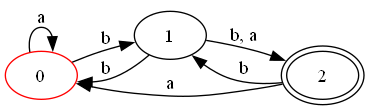

---


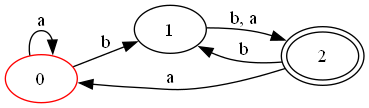

---


In [155]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

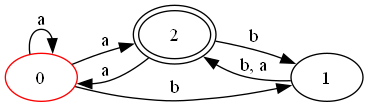

---


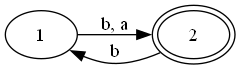

---


In [157]:
# Fournir un autre jeu de tests
auto_test = copy.deepcopy(auto1)
t1 = Transition(s0, 'a', s2)
auto_test.addTransition(t1)
auto_test.show()
print("---")
assert auto_test.estDeterministe() == False

auto_test.removeTransition(t1)
assert auto_test.estDeterministe() == True

auto_test.removeState(s0)
auto_test.show()
print("---")
assert auto_test.estDeterministe() == False

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [105]:
# A faire par l'étudiant

def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """
    new_auto = copy.deepcopy(self)
    
    id_T = new_auto.nextId()
    T = State(id_T, False, False)
    added_T = False

    # On parcourt une copie pour éviter l’erreur
    etats = set(new_auto.allStates)
    
    # Parcours de tous les états accessibles pour ajouter les transitions manquantes
    for s in etats:
        for lettre in Alphabet:
            if len(new_auto.succElem(s, lettre)) == 0:
                # Ajouter la transition vers T
                if not added_T:
                    new_auto.addState(T)
                    added_T = True
                new_auto.addTransition(Transition(s, lettre, T))
    
    # Ajouter les transitions depuis T vers lui-même pour toutes les lettres
    if added_T:
        for lettre in Alphabet:
            new_auto.addTransition(Transition(T, lettre, T))
    
    return new_auto

Automate.completeAutomate = completeAutomate

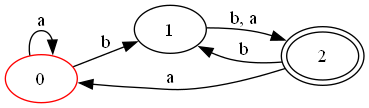

---


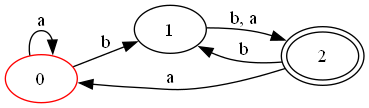

---


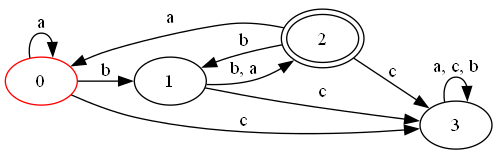

In [107]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

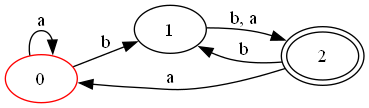

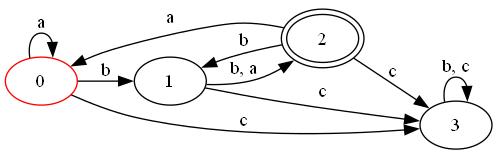

In [164]:
# Fournir un autre jeu de tests
assert auto1.estComplet({'a'}) == True
auto1c1 = auto1.completeAutomate({'a'})
auto1c1.show()
assert auto1c1.estComplet({'a'}) == True

assert auto1.estComplet({'b', 'c'}) == False
auto1c2 = auto1.completeAutomate({'b', 'c'})
auto1c2.show()
assert auto1c2.estComplet({'b', 'c'}) == True

### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une chaine de caractères représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de cha^nes de caractères, la trie en ordre alphabétique.

In [109]:
# A faire par l'étudiant

def newLabel(S):
    """ set[State] -> str
    """
    # Récupérer les labels des états
    L = [s.label for s in S]
    # Trier les labels
    L.sort()
    # Construire la chaîne finale
    return "{" + ",".join(L) + "}"

In [169]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

assert newLabel(auto1.allStates) == '{0,1,2}'

In [171]:
# Fournir un autre jeu de tests
assert newLabel(aut.allStates) == '{1,2}'
assert newLabel(automate.allStates) == '{0,1,2,3}'
assert newLabel(auto1.allStates) == '{0,1,2}'
assert newLabel(auto.allStates) == '{0,1,2}'
assert newLabel(auto2.allStates) == '{0,1,2}'

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [113]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé d'auto """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, {lab})
    return A

Automate.determinisation = determinisation

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [181]:
# A faire par l'étudiant (on conserve la spécification de la fonction)

def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    if i >= len(ListeEtatsATraiter):
        return
    
    s = ListeEtatsATraiter[i]
    etatsAuto = Etats[s]

    for a in Alphabet:
        succ = set()
        for e in etatsAuto:
            succ.update(auto.succElem(e, a))

        if succ:
            lab_succ = newLabel(succ)

            if lab_succ not in DejaVus:
                fin_succ = any(e.fin for e in succ)
                nouvel_etat = State(len(ListeEtatsATraiter), False, fin_succ, lab_succ)
                self.addState(nouvel_etat)
                ListeEtatsATraiter.append(nouvel_etat)
                Etats[nouvel_etat] = succ
                DejaVus.add(lab_succ)
            else:
                for etat in Etats:
                    if etat.label == lab_succ:
                        nouvel_etat = etat
                        break

            # Ajouter la transition déterminisée
            self.addTransition(Transition(s, a, nouvel_etat))

    # Appel récursif après traitement de toutes les lettres
    self.determinisation_etats(auto, Alphabet, ListeEtatsATraiter, i+1, Etats, DejaVus)

Automate.determinisation_etats = determinisation_etats

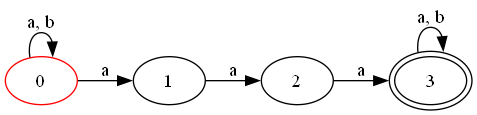

True


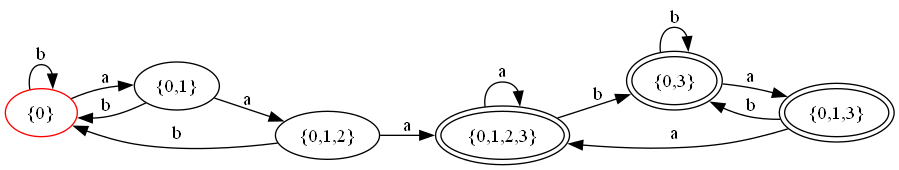

In [183]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate.show()
automate_det = automate.determinisation()
print(automate_det.estDeterministe())
automate_det.show(2)

---


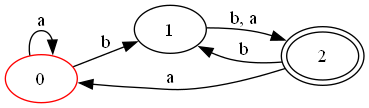

True


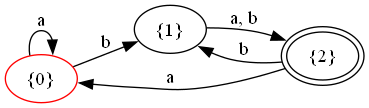

In [195]:
# Fournir un autre jeu de tests
det = auto1.determinisation()
assert det.estDeterministe()

print("---")

auto1.show()
auto1_det = auto1.determinisation()
print(auto1_det.estDeterministe())
auto1_det.show(1.2)

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [198]:
def complementaire(self, Alphabet):
    """ Automate x set[str] -> Automate
        rend  l'automate acceptant le complémentaire du langage de self
    """
    # déterminiser l'automate
    auto_det = self.determinisation()
    # compléter l'automate pour l'alphabet
    auto_complet = auto_det.completeAutomate(Alphabet)
    # inverser les états finaux
    for s in auto_complet.allStates:
        s.fin = not s.fin
    
    return auto_complet

Automate.complementaire = complementaire   

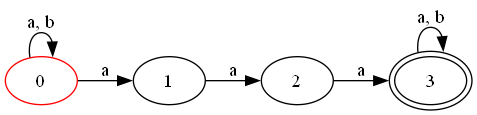

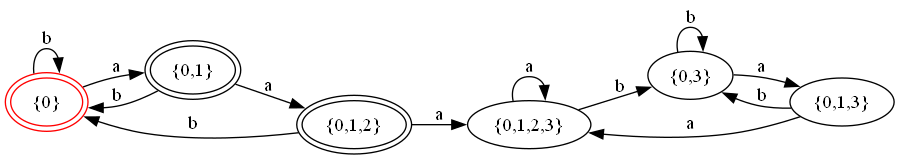

In [ ]:
# Voici un test

automate = Automate.creationAutomate("exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

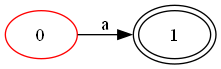

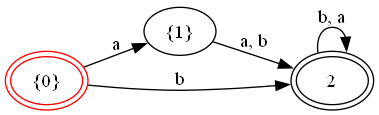

In [202]:
# Fournir un autre jeu de tests
s0 = State(0, True, False)
s1 = State(1, False, True)

t = Transition(s0, 'a', s1)

A = Automate({t}, {s0, s1})

alphabet = {'a', 'b'}

A.show()

Acompl = A.complementaire(alphabet)
Acompl.show(1.5)

2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [205]:
# Visualisation du fonctionnement de itertools.product
L1 = [1, 2, 3]
L2 = ["a", "b", "c"]
L = set(itertools.product(L1, L2))
print(L)

{(1, 'c'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b'), (1, 'a'), (1, 'b'), (2, 'c'), (3, 'c')}


In [215]:
#A faire par l'étudiant

def intersection(self, auto):
    Alphabet = {t.etiquette for t in self.allTransitions} | \
               {t.etiquette for t in auto.allTransitions}

    # Produits des états initiaux
    init_pairs = list(itertools.product(
        self.getSetInitialStates(),
        auto.getSetInitialStates()
    ))
    s0_1, s0_2 = init_pairs[0]

    init_label = f"{s0_1.label},{s0_2.label}"
    init_fin = s0_1.fin and s0_2.fin
    s_init = State(0, True, init_fin, init_label)

    A = Automate(set())   
    A.addState(s_init)    
    Etats = {s_init: (s0_1, s0_2)}
    ListeEtatsATraiter = [s_init]
    DejaVus = {init_label}

    i = 0
    while i < len(ListeEtatsATraiter):
        s = ListeEtatsATraiter[i]
        e1, e2 = Etats[s]

        for lettre in Alphabet:

            succ1 = self.succElem(e1, lettre)
            succ2 = auto.succElem(e2, lettre)

            # produit cartésien
            for t1, t2 in itertools.product(succ1, succ2):

                lab_succ = f"{t1.label},{t2.label}"

                if lab_succ not in DejaVus:
                    fin_succ = t1.fin and t2.fin
                    nouvel_etat = State(len(ListeEtatsATraiter), False, fin_succ, lab_succ)
                    A.addState(nouvel_etat)
                    Etats[nouvel_etat] = (t1, t2)
                    ListeEtatsATraiter.append(nouvel_etat)
                    DejaVus.add(lab_succ)
                else:
                    nouvel_etat = next(st for st in Etats if st.label == lab_succ)

                A.addTransition(Transition(s, lettre, nouvel_etat))

        i += 1

    return A

Automate.intersection = intersection  

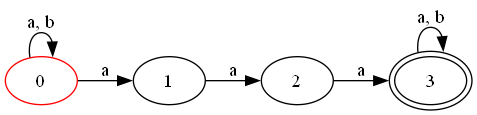

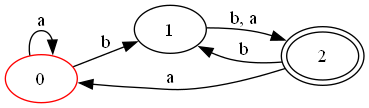

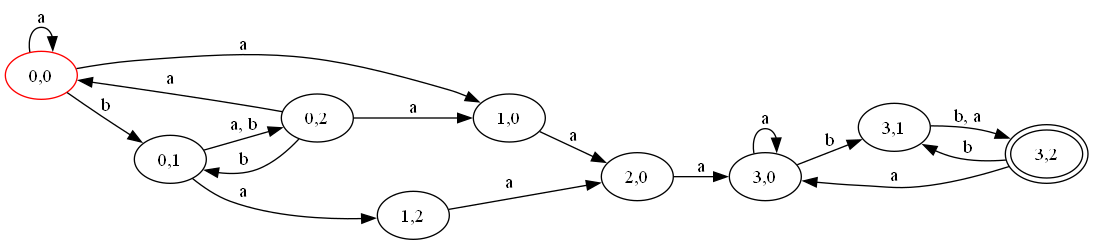

In [217]:
#Un premier test

#auto1 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
#auto2 = Automate.creationAutomate("ExemplesAutomates/exempleInter.txt")
# il faut avoir une variable auto2 contenant un automate
auto2.show()
inter = automate.intersection(auto2)
inter.show(2)

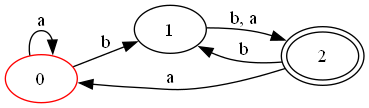

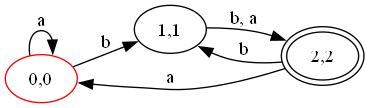

---


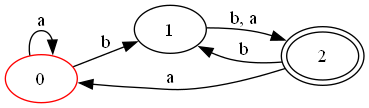

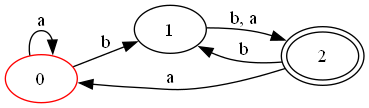

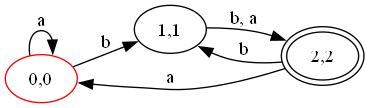

---


In [219]:
# Fournir d'autres tests
auto1.show()
inter1 = auto1.intersection(auto1)
inter1.show(2)
print("---")

auto1.show()
auto2.show()
inter2 = auto1.intersection(auto2)
inter2.show(2)
print("---")

3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [222]:
#À faire par l'étudiant

def union (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'union des langages des deux automates
    """
    # Alphabets des deux automates
    Alphabet = {t.etiquette for t in self.allTransitions}.union({t.etiquette for t in auto.allTransitions})

    # Création du nouvel état initial représentant les états initiaux combinés
    Ini_self = self.getSetInitialStates()
    Ini_auto = auto.getSetInitialStates()
    etats_ini = Ini_self.union(Ini_auto)
    fin_ini = any(s.fin for s in etats_ini)
    s0 = State(0, True, fin_ini, newLabel(etats_ini))

    # Automate résultat
    res = Automate(set())
    res.addState(s0)

    # Dictionnaire pour mémoriser les ensembles d'états déjà créés
    Etats = {s0: etats_ini}
    DejaVus = {s0.label}
    ListeEtatsATraiter = [s0]

    i = 0
    while i < len(ListeEtatsATraiter):
        s = ListeEtatsATraiter[i]
        etats_courants = Etats[s]
        for lettre in Alphabet:
            # Ensemble des successeurs dans les deux automates
            succ = self.succ(etats_courants.intersection(self.allStates), lettre).union(
                   auto.succ(etats_courants.intersection(auto.allStates), lettre))
            
            if succ:
                lab_succ = newLabel(succ)
                # Si l'ensemble n'existe pas encore, créer un nouvel état
                if lab_succ not in DejaVus:
                    fin_succ = any(e.fin for e in succ)
                    nouvel_etat = State(len(ListeEtatsATraiter), False, fin_succ, lab_succ)
                    res.addState(nouvel_etat)
                    ListeEtatsATraiter.append(nouvel_etat)
                    Etats[nouvel_etat] = succ
                    DejaVus.add(lab_succ)
                else:
                    # Récupérer l'état déjà existant
                    nouvel_etat = next(e for e in Etats if e.label == lab_succ)
                # Ajouter la transition
                res.addTransition(Transition(s, lettre, nouvel_etat))
        i += 1

    return res

Automate.union = union

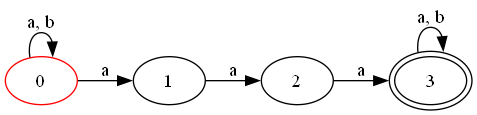

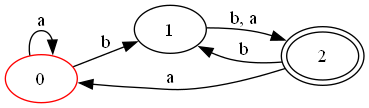

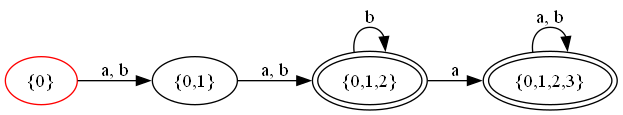

In [224]:
#Un premier test

automate.show()
auto2.show()
uni = automate.union(auto2)
uni.show(2)

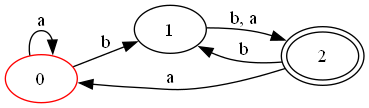

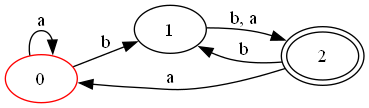

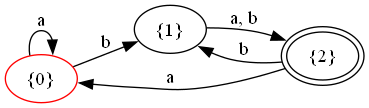

---


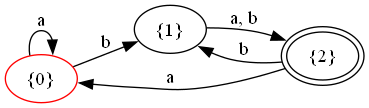

In [226]:
#Fournir d'autres tests
auto1.show()
auto2.show()
uni1 = auto1.union(auto2)
uni1.show(2)
print("---")

auto_vide = Automate(set())
uni2 = auto1.union(auto_vide)
uni2.show(2)

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [117]:
# A faire par l'etudiant

def concatenation (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage la concaténation des langages des deux automates
    """
    # Copier les deux automates pour ne pas modifier les originaux
    auto1_copy = copy.deepcopy(self)
    auto2_copy = copy.deepcopy(auto)

    # Décaler les IDs de auto2 pour éviter les conflits
    offset = auto1_copy.nextId()
    auto2_copy.prefixStates(offset)

    # Ajouter tous les états et transitions de auto2 dans auto1_copy
    for s in auto2_copy.allStates:
        auto1_copy.addState(s)
    for t in auto2_copy.allTransitions:
        auto1_copy.addTransition(t)

    # Relier chaque état final de auto1_copy aux états initiaux de auto2_copy en conservant les transitions de auto2_copy
    for s_fin in self.getSetFinalStates():
        for s_init2 in auto2_copy.getSetInitialStates():
            # transition simulée par '' si nécessaire
            auto1_copy.addTransition(Transition(s_fin, '', s_init2))
        # Les états finaux de auto1_copy ne sont plus finaux
        s_fin.fin = False

    # Les états finaux du nouvel automate sont les états finaux de auto2_copy
    for s in auto2_copy.getSetFinalStates():
        s.fin = True

    return auto1_copy

Automate.concatenation = concatenation

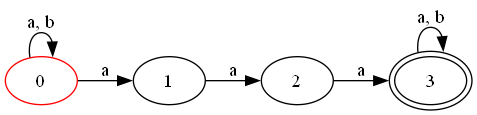

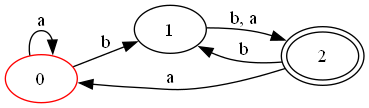

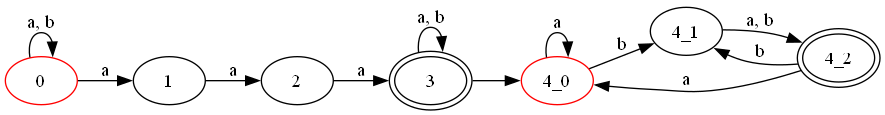

In [231]:
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show()

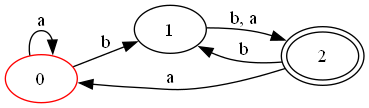

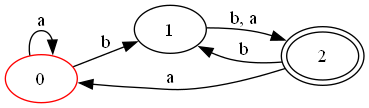

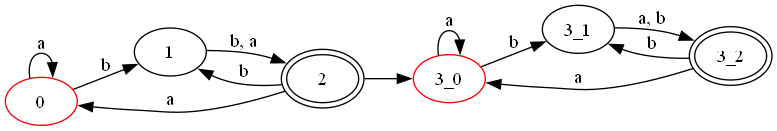

---


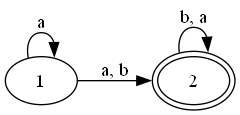

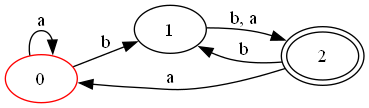

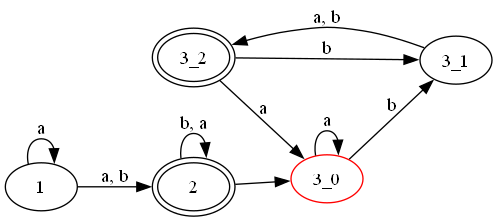

In [233]:
#Fournir d'autres tests
auto1.show()
auto2.show()
concat1 = auto1.concatenation(auto2)
concat1.show(2)
print("---")

aut.show()
auto2.show()
concat2= aut.concatenation(auto2)
concat2.show(2)

In [239]:
def etoile (self):
    """ Automate  -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de l'automate appelant
    """
    # Copier l'automate original
    new_auto = copy.deepcopy(self)
    
    # Nouvel état initial/final
    id_new = new_auto.nextId()
    s_new = State(id_new, True, True)
    new_auto.addState(s_new)
    
    # Relier le nouvel état aux anciens états initiaux par ε-transition (ici '')
    for s_init in new_auto.getSetInitialStates():
        new_auto.addTransition(Transition(s_new, '', s_init))
    
    # Relier chaque état final ancien aux états initiaux anciens par ε-transition
    anciens_inits = new_auto.getSetInitialStates()
    for s_final in new_auto.getSetFinalStates():
        for s_init in anciens_inits:
            new_auto.addTransition(Transition(s_final, '', s_init))
        s_final.fin = False  # les anciens états finaux ne sont plus finaux
    
    return new_auto

Automate.etoile = etoile

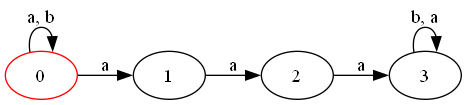

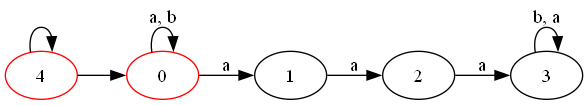

In [241]:
#Un premier test

automate.show()
autoetoile = automate.etoile()
autoetoile.show()

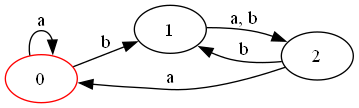

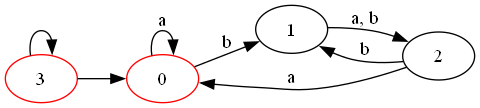

---


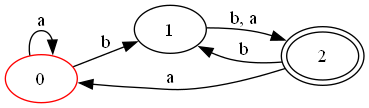

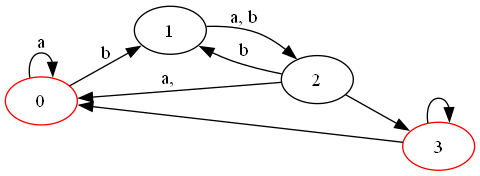

In [243]:
#Fournir d'autres tests
auto1.show()
auto1_etoile = auto1.etoile()
auto1_etoile.show()
print("---")

auto2.show()
auto2_etoile = auto2.etoile()
auto2_etoile.show()

#### 6 Application <a class="anchor" id="sec6"></a>

Cette partie du projet consiste à mettre en pratique l'utilisation d'un automate afin de rechercher des mots dans un texte.
La fonction suivante `alphabet_fichier`, étant donné un fichier textuel, renvoie l'ensemble des lettres présentes dans le texte du fichier.

In [246]:
def alphabet_fichier(nom):
    """ Fichier -> set[str]
    renvoie l'ensemble des lettres apparaissant dans le texte du fichier. 
    Chaque chaine de l'ensemble construit est de taille 1."""
    # A : set[str]
    A = set()
    with open(nom) as fichier:
        # ligne : str
        for ligne in fichier:
            # c : str de taille 1
            for c in ligne:
                A.add(c)
    return A

In [ ]:
alphabet = alphabet_fichier("Extrait_Nicolas_Appert.txt")
print(alphabet)

{'c', 'f', '5', ',', 'v', '4', 'o', 'D', '-', 'r', ' ', 'x', 'a', 's', 'm', 'à', 'n', '6', '1', 'u', '\n', '3', 'O', '2', 'b', '0', 'g', 'S', 'l', 't', 'j', 'è', 'L', 'd', 'y', 'E', 'h', 'q', 'p', ';', 'i', 'û', 'ç', 'é', 'e', "'", '.', ':', 'ê'}


Notre but consiste à extraire tous les nombres décimaux apparaissant dans un texte. Un nombre décimal vérifie la spécification suivante :
- ses premiers caractères sont des chiffres entre 0 et 9;
- le séparateur `,` apparait entre la partie entière et la partie décimale du nombre;
- ses derniers caractères sont des chiffres de 0 à 9.
Comme ces nombres apparaissent dans des chaîne de caractères, ils sont du type `str` dans notre contexte.

Ainsi `'012,4'`et `'0,12345'`sont des nombres décimaux, par contre `',123'`, `'123'` ou `'123.456'` n'en sont pas.

Donner une définition de la fonction `auto_flottant` qui, étant donné un ensemble de lettres `Alphabet`, renvoie l'automate acceptant comme langage l'ensemble des nombres décimaux.

Remarque :
- il faut que les nombres, sous forme de chaines de caractères extraites, représentent des nombres décimaux complets, c'est-à-dire qu'ils contiennent tous les chiffres consécutifs du texte. Par exemple, si le texte est 
`'abc123,4560def'` le seul nombre qui est extrait est `'123,4560'`;
- si le nombre décimal termine une ligne, il y a un cas particulier à gérer.

In [255]:
# C'est une fonction, pas une méthode

def auto_flottant(Alphabet):
    """set[str] -> Automate
        prend en entrée en ensemble de chaines de caractères (chacune de taille 1),
        et renvoie l'automate acceptant les nombres décimaux."""
    # États
    s0 = State(0, True, False, "s0")  # état initial
    s1 = State(1, False, False, "s1") # partie entière
    s2 = State(2, False, False, "s2") # séparateur ','
    s3 = State(3, False, True, "s3")  # partie décimale (final)
    
    # Ensemble des chiffres dans l'alphabet
    chiffres = {c for c in Alphabet if c.isdigit()}
    
    # Transitions
    transitions = set()
    
    # De s0 vers s1 avec un chiffre
    for c in chiffres:
        transitions.add(Transition(s0, c, s1))
    
    # S1 reste sur s1 tant qu'on lit des chiffres
    for c in chiffres:
        transitions.add(Transition(s1, c, s1))
    
    # De s1 vers s2 sur ','
    if ',' in Alphabet:
        transitions.add(Transition(s1, ',', s2))
    
    # De s2 vers s3 sur un chiffre
    for c in chiffres:
        transitions.add(Transition(s2, c, s3))
    
    # S3 reste sur s3 tant qu'on lit des chiffres
    for c in chiffres:
        transitions.add(Transition(s3, c, s3))
    
    # Création de l'automate
    auto = Automate(transitions, {s0, s1, s2, s3})
    return auto

{'c', 'f', '5', ',', 'v', '4', 'o', 'D', '-', 'r', ' ', 'x', 'a', 's', 'm', 'à', 'n', '6', '1', 'u', '\n', '3', 'O', '2', 'b', '0', 'g', 'S', 'l', 't', 'j', 'è', 'L', 'd', 'y', 'E', 'h', 'q', 'p', ';', 'i', 'û', 'ç', 'é', 'e', "'", '.', ':', 'ê'}


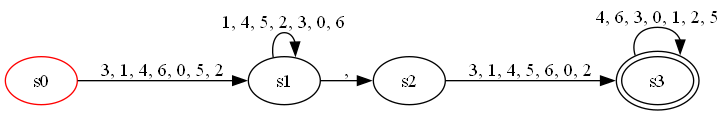

In [ ]:
# Jeu de test
alphabet = alphabet_fichier("Extrait_Nicolas_Appert.txt")
print(alphabet)
alphabet.add(' ')  ## permet de terminer les lignes par un espace (si jamais)
auto = auto_flottant(alphabet)
auto.show(300)

Donner une définition de la fonction `liste_flottants` prenant en entrée un automate ainsi qu'un fichier textuel et renvoyant la liste des nombres flottants présents dans le texte.

In [259]:
def liste_flottants(auto, nom):
    """ Automate x Fichier -> list[str]
        renvoie la liste des nombres décimaux, sous forme de chaines de caractères, apparaissant
        dans l'ordre de lecture dans le fichier.
    """
    result = []  # liste des nombres flottants trouvés
    
    with open(nom) as fichier:
        for ligne in fichier:
            i = 0
            while i < len(ligne):
                j = i
                etats_courants = auto.getSetInitialStates()
                dernier_etat_final = None
                pos_dernier_final = i - 1
                
                # Parcours de la ligne pour simuler l'automate
                while j < len(ligne) and etats_courants:
                    c = ligne[j]
                    etats_courants = auto.succ(etats_courants, c)
                    if any(s.fin for s in etats_courants):
                        dernier_etat_final = etats_courants.copy()
                        pos_dernier_final = j
                    j += 1
                
                # Si un état final a été atteint, extraire le flottant
                if dernier_etat_final:
                    nombre = ligne[i:pos_dernier_final + 1]
                    result.append(nombre)
                    i = pos_dernier_final + 1  # passer après le nombre trouvé
                else:
                    i += 1  # avancer d'un caractère
    
    return result


In [ ]:
# Jeu de test
liste_flottants(auto, "Extrait_Nicolas_Appert.txt") == ['1,020', '26,500', '3,600', '1,200', '2,040']

True